In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [3]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw_data

import icewave.display.maps as maps

import icewave.field.time as tfield



#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.phone.rw_pyphone as rw

macOS
laita.pmmh-local.espci.fr
Please install garmin package


In [4]:
import icewave.analysis.bathy as bathy

In [5]:
bathy_data = bathy.get_bathy()

(<Axes: title={'center': 'Bathymétrie, haha'}, xlabel='Longitude', ylabel='Latitude'>,
 {1: {'fignum': 'Bathymétrie_haha', 'data': {}}})

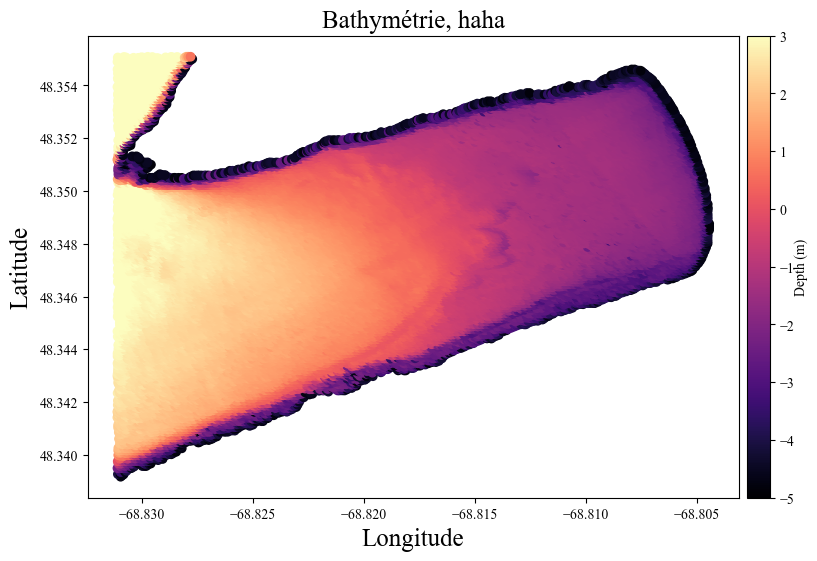

In [8]:
bathy.display_bathy(bathy_data,"haha")

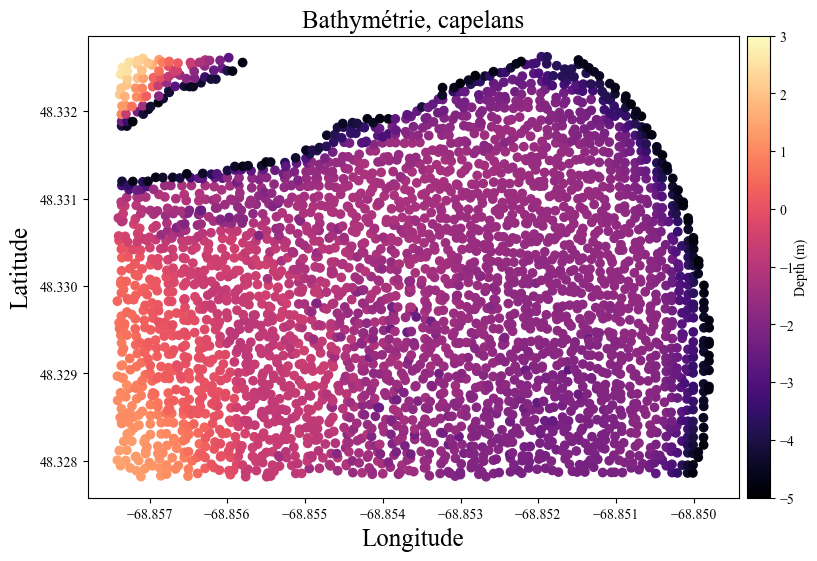

In [9]:
ax,figs = bathy.display_bathy(bathy_data,"capelans")

In [10]:
date = '0211'
year = '2025'
tide_data = bathy.load_tide_data(date,year)

/Volumes/Backup25/Data/0211/Marees/2025-02-11_r01m_tides.csv


'0223'

(<Axes: title={'center': '0211 / 2025'}, xlabel='UTC time', ylabel='Height (m)'>,
 {1: {'fignum': 'Height_m_vs_UTCtime',
   'data': {'xdata_0': array([ 18000.,  18060.,  18120., ..., 104220., 104280., 104340.]),
    'ydata_0': array([2.653, 2.662, 2.671, ..., 2.469, 2.481, 2.491])}}})

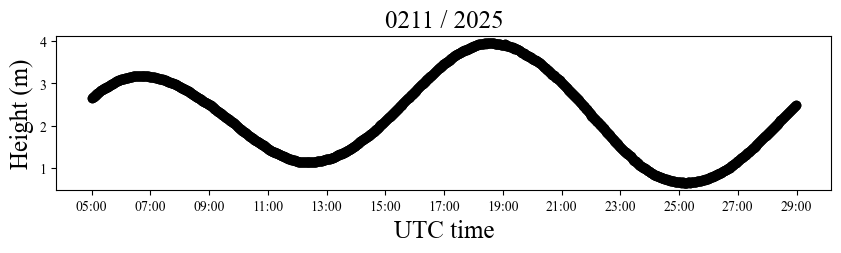

In [11]:
bathy.display_tide(tide_data,date,year=year)

In [12]:
fi = bathy.interpolator(bathy_data)

In [13]:
t0 = 18*3600
htide = bathy.get_height(date,t0,tide_data=tide_data)
print(htide)

3.878


In [21]:
date

'0211'

In [14]:
import icewave.tools.datafolders as df

base = df.find_path(disk='Backup25',year='2025')
folder = base+date+'/Summary/'
print(folder)

filename = glob.glob(folder+'records*.pkl')[0]

import icewave.tools.rw_data as rw
record = rw.load_pkl(filename)

print(record.keys())


/Volumes/Backup25/Data/0211/Summary/
dict_keys(['gps', 'drones', 'phones', 'geophones'])


In [24]:
import icewave.field.multi_instruments as multi

print(date)
record = multi.get_records(date,year='2025')

0211
/Volumes/Shack25/Data/0211/GPS/Waypoints_2025-02-11.gpx
['/Volumes/Shack25/Data/0211/GPS/Map_Table.txt']
[[374, 'depart'], [375, 'S_01'], [376, 'S_02'], [377, 'S_03'], [378, 'S_04'], [379, 'S_05'], [380, 'S_06'], [381, 'S_07'], [382, 'S_08'], [383, 'S_09'], [384, 'S_11'], [385, 'S_12'], [386, 'S_13'], [387, 'S_14'], [388, 'S_15'], [389, 'S_16'], [390, 'S_17'], [391, 'S_18'], [392, 'S_19'], [393, 'S_20'], [394, 'S_21'], [395, 'S_21'], [396, 'S_23'], [397, 'S_24'], [398, 'S_25'], [399, 'S_26'], [400, 'S_27'], [401, 'S_28'], [402, 'S_29'], [403, 'S_30'], [404, 'S_31'], [405, 'S_32'], [406, 'H_58'], [407, 'T_00'], [408, 'H_86'], [409, 'T_22'], [410, 'H_62'], [411, 'T_23'], [412, 'H_90'], [412, 'T_24'], [413, 'H_53'], [414, 'T_00'], [415, 'H_38'], [416, 'T_19'], [419, 'T_28'], [420, 'T_35'], [421, 'T_27'], [422, 'T_19'], [423, 'H_57'], [424, 'H_55'], [425, 'H_61'], [426, 'H_39'], [427, 'Wind_01'], [428, 'borne_01']]
dict_keys([374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385,

['/Volumes/Shack25/Data/0211/Drones/mesange/02-waypoints_001/DJI_20250211100550_0348_D.SRT',
 '/Volumes/Shack25/Data/0211/Drones/mesange/02-waypoints_001/DJI_20250211100203_0347_D.SRT',
 '/Volumes/Shack25/Data/0211/Drones/mesange/03-doc_002/DJI_20250211101106_0351_D.SRT',
 '/Volumes/Shack25/Data/0211/Drones/mesange/05-waves_001/DJI_20250211144016_0355_D.SRT',
 '/Volumes/Shack25/Data/0211/Drones/mesange/06-waves_002/DJI_20250211144503_0356_D.SRT',
 '/Volumes/Shack25/Data/0211/Drones/mesange/07-stereo_001/DJI_20250211151223_0357_D.SRT',
 '/Volumes/Shack25/Data/0211/Drones/mesange/07-stereo_001/DJI_20250211153118_0362_D.SRT',
 '/Volumes/Shack25/Data/0211/Drones/mesange/07-stereo_001/DJI_20250211151610_0358_D.SRT',
 '/Volumes/Shack25/Data/0211/Drones/mesange/07-stereo_001/DJI_20250211151957_0359_D.SRT',
 '/Volumes/Shack25/Data/0211/Drones/mesange/07-stereo_001/DJI_20250211152344_0360_D.SRT',
 '/Volumes/Shack25/Data/0211/Drones/mesange/07-stereo_001/DJI_20250211152731_0361_D.SRT',
 '/Volume

In [35]:
import icewave.gps.garmin as garmin

filegpx = '/Volumes/Backup25/Data/0211/GPS/Waypoints_2025-02-11_edited.gpx'

import gpxpy
gpx_file = open(filegpx, 'r')
gpx = gpxpy.parse(gpx_file)



None


In [41]:
phonelist = [27,28,35]

pos={}
for wpt in gpx.waypoints:
    if 'T_' in wpt.name:
        phone = int(wpt.name.split('_')[2])
        if phone in phonelist:
             pos[phone]=wpt

4.559774141777034
4.604879518284024
4.37160906515539


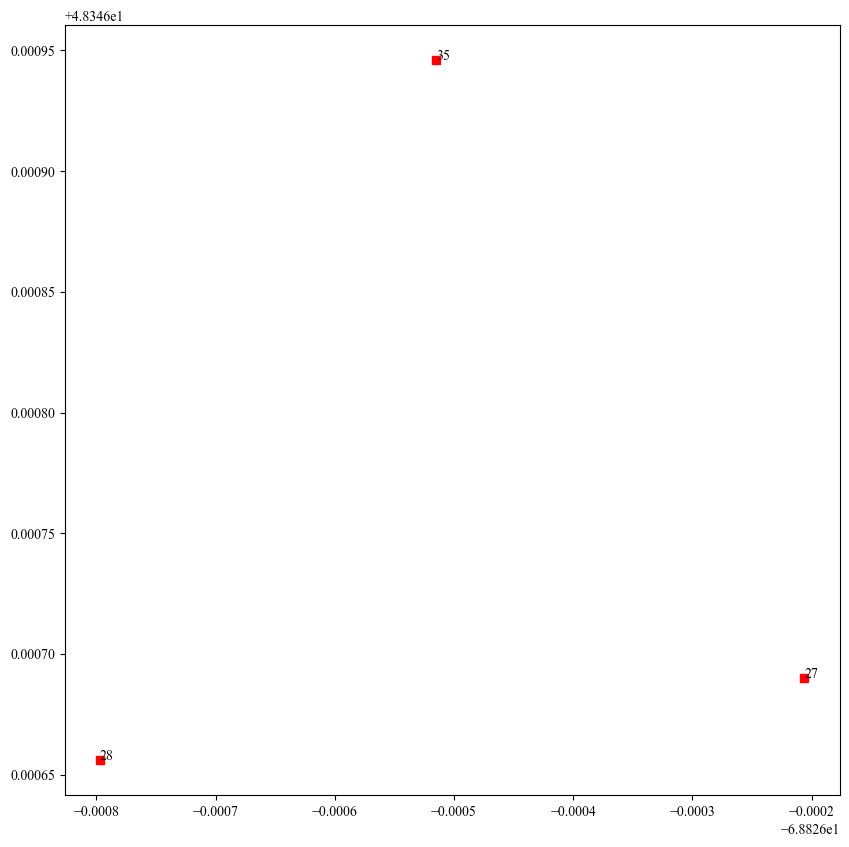

In [99]:
fig,ax = plt.subplots(figsize=(10,10))
for phone in pos.keys():
    lat = pos[phone].latitude
    lon = pos[phone].longitude
    
    ax.plot(lon,lat,'rs')
    ax.text(lon,lat,phone)
    
    hlocal = bathy.get_local_height(lon,lat,date,tmin,tide_data=tide_data,fi=fi)
    print(hlocal)

In [84]:
datemax = '0212'
tide_data2 = bathy.load_tide_data(datemax,year)


/Volumes/Backup25/Data/0212/Marees/2025-02-12_r01m_tides.csv


In [88]:
tide_data2

{'0212': {'date': ['2025-02-12T00:00:00.000000-0500',
   '2025-02-12T00:01:00.000000-0500',
   '2025-02-12T00:02:00.000000-0500',
   '2025-02-12T00:03:00.000000-0500',
   '2025-02-12T00:04:00.000000-0500',
   '2025-02-12T00:05:00.000000-0500',
   '2025-02-12T00:06:00.000000-0500',
   '2025-02-12T00:07:00.000000-0500',
   '2025-02-12T00:08:00.000000-0500',
   '2025-02-12T00:09:00.000000-0500',
   '2025-02-12T00:10:00.000000-0500',
   '2025-02-12T00:11:00.000000-0500',
   '2025-02-12T00:12:00.000000-0500',
   '2025-02-12T00:13:00.000000-0500',
   '2025-02-12T00:14:00.000000-0500',
   '2025-02-12T00:15:00.000000-0500',
   '2025-02-12T00:16:00.000000-0500',
   '2025-02-12T00:17:00.000000-0500',
   '2025-02-12T00:18:00.000000-0500',
   '2025-02-12T00:19:00.000000-0500',
   '2025-02-12T00:20:00.000000-0500',
   '2025-02-12T00:21:00.000000-0500',
   '2025-02-12T00:22:00.000000-0500',
   '2025-02-12T00:23:00.000000-0500',
   '2025-02-12T00:24:00.000000-0500',
   '2025-02-12T00:25:00.000000-050

In [97]:
imin = 22
imax = 49

pfolder =  '/Volumes/Backup25/Data/0211/Phone/'

H = []
T = []
for phone in phonelist:
    #print(phone)
    folder = pfolder + str(phone)
    filelist = glob.glob(folder+'/*.h5')
    root = '_'.join(filelist[0].split('_')[:-1])+'_'
    
    for i in range(imin,imax+1):    
        fmin = root+f'num{i}.h5'
        dmin = rw.read_h5(fmin)
        a=dmin['t_sync'][0]/24/3600
        tmin = (a-np.floor(a))*24*3600
        #print(tmin)
        if tmin<50000:
            h1 = bathy.get_height(datemin,tmin,tide_data=tide_data)
            tmin = tmin+24*3600
            print(h1)
        else:
            h1 = bathy.get_height(datemin,tmin,tide_data=tide_data)
        T.append(tmin)
        H.append(h1)

2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653
2.653


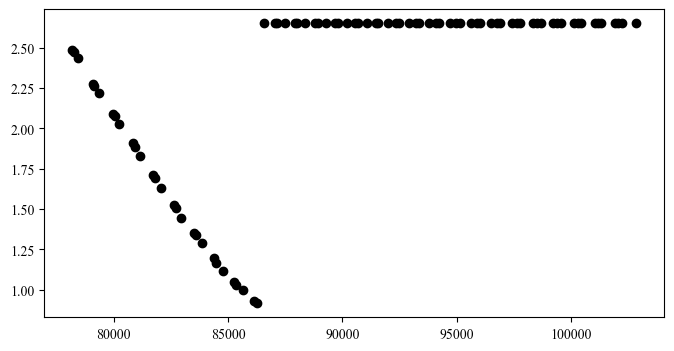

In [98]:
fig,ax = plt.subplots(figsize=(8,4))


ax.plot(T,H,'ko')

In [61]:
import icewave.field.time as time

tmin = time.convert_time(tmin)
tmax = time.convert_time(tmax)

In [62]:
h1 = bathy.get_height(date,tmin,tide_data=tide_data)
h2 = bathy.get_height(date,tmax,tide_data=tide_data)

print(h1,h2)

4.099 3.909


-68.8507461875 48.329838708375


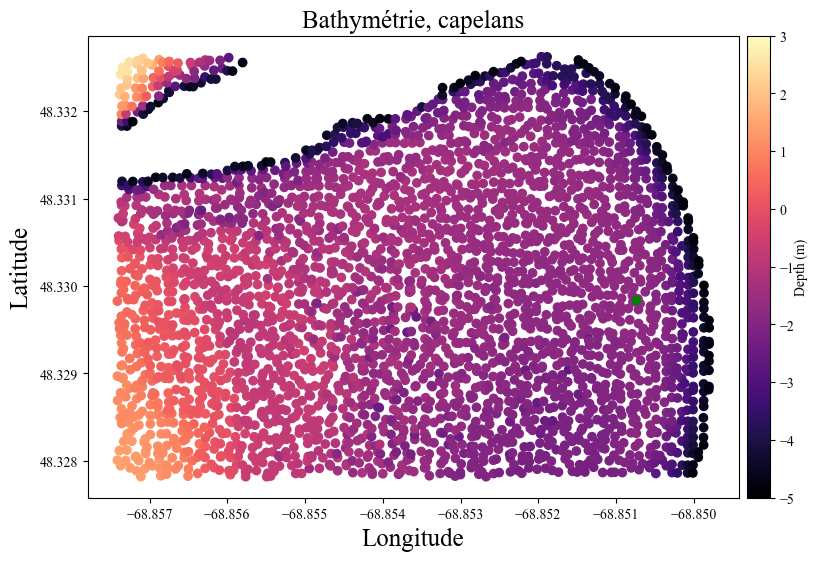

In [68]:
ax,figs = bathy.display_bathy(bathy_data,"capelans")

print(lon,lat)
ax.plot(lon,lat,'go')

dict_keys(['Seis014', 'Seis015'])
2.39
2.21
dict_keys(['Seis014', 'Seis015'])
2.36
2.17
dict_keys(['Seis015', 'Seis016'])
2.39
2.2


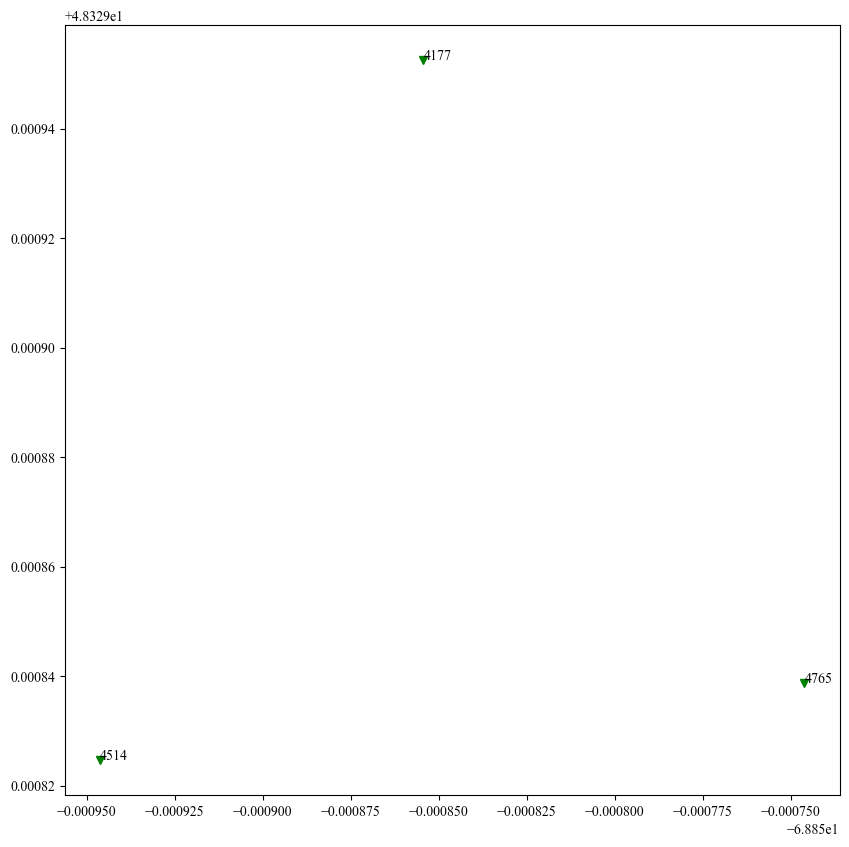

In [70]:

fig,ax = plt.subplots(figsize=(10,10))
for key in trio:
    print(record['geophones'][key].keys())
    k = list(record['geophones'][key].keys())[1]
    lat = np.mean(record['geophones'][key][k]['latitude'])
    lon = np.mean(record['geophones'][key][k]['longitude'])
    ax.plot(lon,lat,'gv')
    ax.text(lon,lat,key)
    
    tmin = record['geophones'][key][k]['time'][0]
    tmax = record['geophones'][key][k]['time'][-1]

    #print(tmin,tmax)
    tmin = time.convert_time(tmin)
    tmax = time.convert_time(tmax)

    hloc1 = bathy.get_local_height(lon,lat,date,tmin,tide_data=tide_data,fi=fi)
    hloc2 = bathy.get_local_height(lon,lat,date,tmax,tide_data=tide_data,fi=fi)
    
    print(np.round(hloc1,decimals=2))
    print(np.round(hloc2,decimals=2))

In [59]:
lat0 = 48.348
lon0 = -68.815
hbathy = fi(lon0,lat0)
print(hbathy)

-0.0972823883476244


In [61]:
lat0 = 48.348
lon0 = -68.815
t0 = 18*3600
hlocal = bathy.get_local_height(lon0,lat0,date,t0,tide_data=tide_data,fi=fi)
print(hlocal)

3.6027176116523756
